In [1]:
import pandas as pd
import numpy as np
import umap
import sys
sys.path.insert(1, "/home/robbe/ionbot")
import OxiAnalysis as OA
import matplotlib.pyplot as plt
import seaborn as sns
import umap.plot

## Unsupervised

In [2]:
data = pd.read_csv("data.csv")
X = data.copy()
y = X.pop("Unnamed: 0")
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)


In [3]:
mapper = umap.UMAP().fit(X_scaled)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

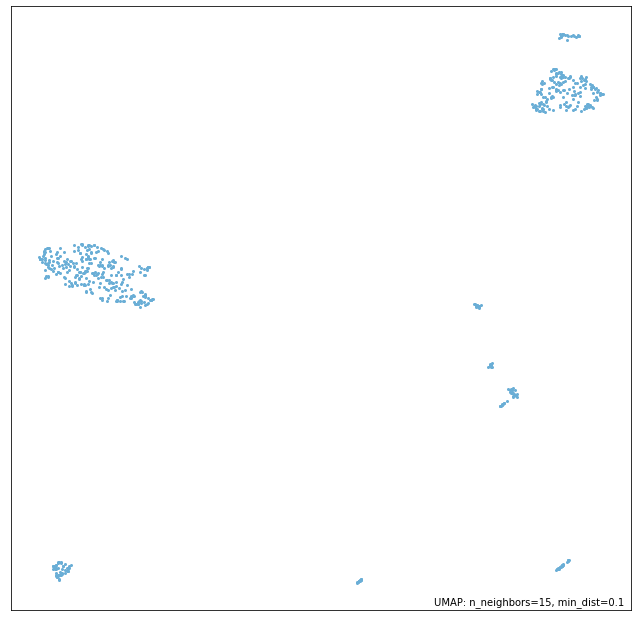

In [4]:
umap.plot.points(mapper)

In [5]:
Project = pd.read_csv("/home/robbe/ionbot/PCA_ML/pca_df_with_ann2.csv", sep=";", decimal=",")["Project"]

<AxesSubplot:>

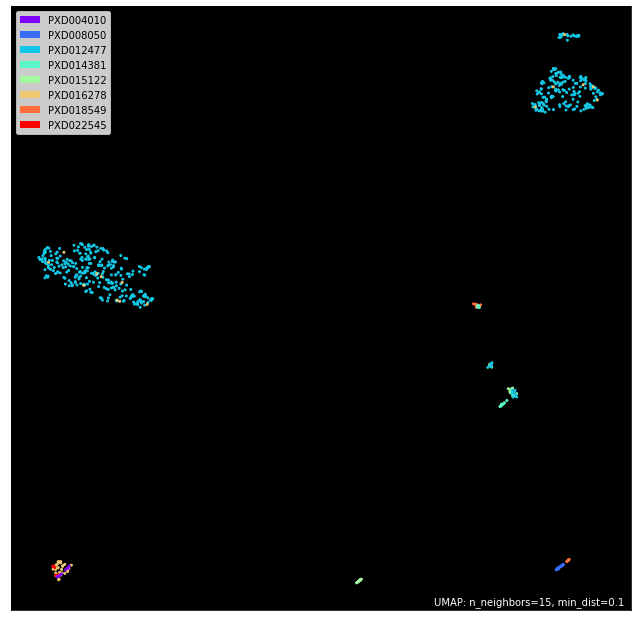

In [6]:
umap.plot.points(mapper, labels=Project, theme="fire")

In [7]:
treatment =  pd.read_csv("/home/robbe/ionbot/PCA_ML/pca_df_with_ann2.csv", sep=";", decimal=",")["Treatment"]

<AxesSubplot:>

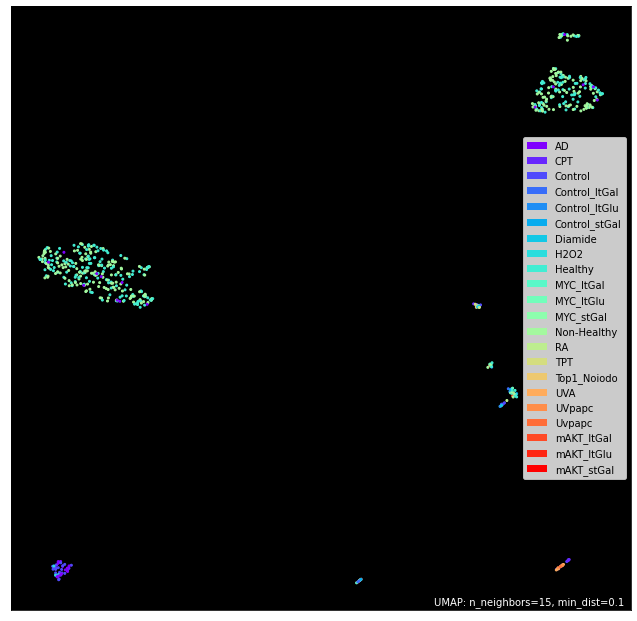

In [8]:
umap.plot.points(mapper, labels=treatment, theme="fire")

In [9]:
Timepoint = pd.read_csv("/home/robbe/ionbot/PCA_ML/pca_df_with_ann2.csv", sep=";")["Timepoint"]

In [10]:
Timepoint = Timepoint.replace(np.nan, "NA")

<AxesSubplot:>

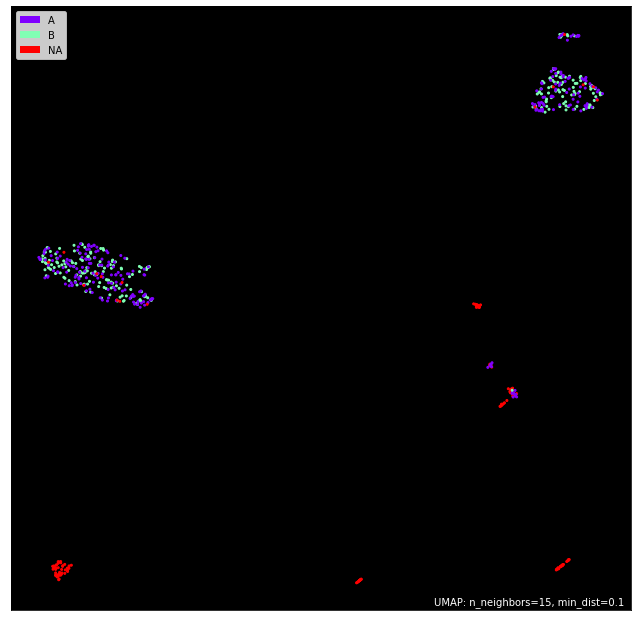

In [11]:
umap.plot.points(mapper, labels=Timepoint, theme="fire")

## Semi-Supervised 

In [17]:
treatmentcat = pd.Categorical(treatment).codes

In [18]:
treatmentcat

array([19, 19, 21, 21, 20, 20,  9,  9, 11, 11, 10, 10,  3,  3,  5,  5,  4,
        4, 19, 19, 21, 21, 20, 20,  9,  9, 11, 11, 10, 10,  3,  3,  5,  5,
        4,  4,  8,  8, 12, 12,  8,  8,  8,  8, 12, 12, 12, 12,  8,  8,  8,
        8,  8,  8, 12, 12, 12, 12,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12,  8,  8,  8,  8,  8,  8,  8,  8,
       12, 12, 12, 12, 12, 12, 12, 12,  8,  8,  8,  8, 12, 12, 12, 12, 12,
       12, 12, 12,  8,  8,  8,  8, 12, 12, 12, 12,  8,  8,  8,  8, 12, 12,
       12, 12,  8,  8,  8,  8, 12, 12, 12, 12, 12, 12, 12, 12,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 12, 12, 12, 12,
       12, 12, 12, 12,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 12,
       12, 12, 12,  8,  8,  8,  8,  8,  8,  8,  8, 12, 12, 12, 12,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12

In [21]:
treatment, mapping_index = pd.Series(treatment).factorize()

In [20]:
embedding = umap.UMAP().fit_transform(X_scaled, y=treatmentcat)

Text(0.5, 1.0, 'Semi-Supervised UMAP')

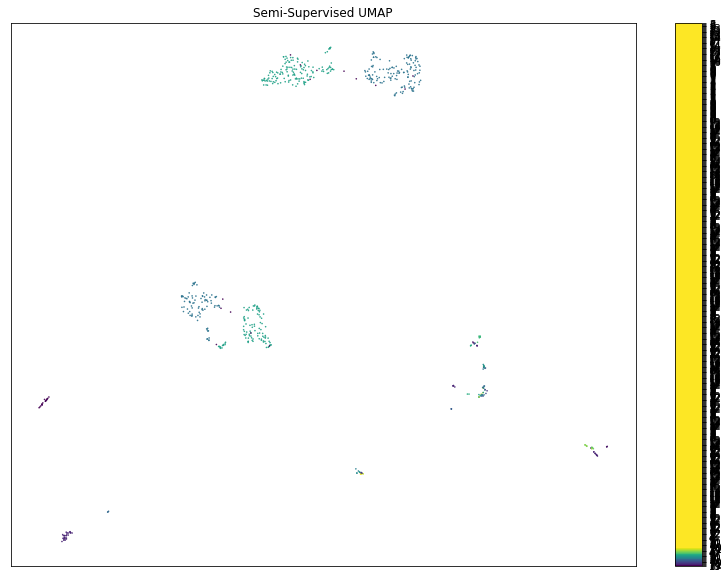

In [38]:
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=treatmentcat, alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(642)-0.5)
cbar.set_ticks(np.arange(641))
cbar.set_ticklabels(treatmentcat)
plt.title('Semi-Supervised UMAP')